In [1]:
%load_ext autoreload
%autoreload 2

from scipy import signal
import numpy as np
from scipy.fftpack import fft, ifft
import pandas as pd

import matplotlib
matplotlib.use('nbagg')
from pylab import rcParams
rcParams['figure.figsize'] = 9, 4
import matplotlib.pyplot as plt
import scipy


from pyha import Hardware, simulate, sims_close, Complex, resize, hardware_sims_equal
from pyha.common.util import *
from pyha.common.float import *

In [2]:
class Accumulator(Hardware):
    def __init__(self):
        self.DELAY = 1
        self.acc = Float(0.0)

    def main(self, x):
        self.acc += x
        return self.acc

    def model_main(self, x):
        return np.cumsum(x)

In [3]:
# np.random.seed(0)
# inp = abs(np.random.normal(size=1024*4*4*4))
inp = np.random.normal(size=1024*4*4*4*4)

# inp = np.random.uniform(0, 1, size=1024*8*2)

# inp = [0.25] * 1024 * 8

In [4]:
results = {}

with force_format(radix=16, exponent_bits=4, fractional_bits=12):
    dut = Accumulator()
    sims = simulate(dut, inp, input_types=[Float()], simulations=['MODEL', 'PYHA'])
    results['Float64'] = np.array([float(x) for x in sims['MODEL']])
    results['Radix32'] = np.array([float(x) for x in sims['PYHA']])

with force_format(radix=16, exponent_bits=4, fractional_bits=13):
    dut = Accumulator()
    sims = simulate(dut, inp, input_types=[Float()], simulations=['PYHA'])
    results['Radix16'] = np.array([float(x) for x in sims['PYHA']])

with force_format(float16_mode=True):
    dut = Accumulator()
    sims = simulate(dut, inp, input_types=[Float()], simulations=['PYHA'])
    results['Float16'] = np.array([float(x) for x in sims['PYHA']])


INFO:sim:Converting model to hardware types ...
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 262145/262145 [00:14<00:00, 18485.83it/s]

INFO:sim:OK!
INFO:sim:Simulations completed!


INFO:sim:Converting model to hardware types ...
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 262145/262145 [00:14<00:00, 18399.63it/s]

INFO:sim:OK!
INFO:sim:Simulations completed!


INFO:sim:Converting model to hardware types ...
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 262145/262145 [00:08<00:00, 30771.45it/s]

INFO:sim:OK!
INFO:sim:Simulations completed!


<IPython.core.display.Javascript object>


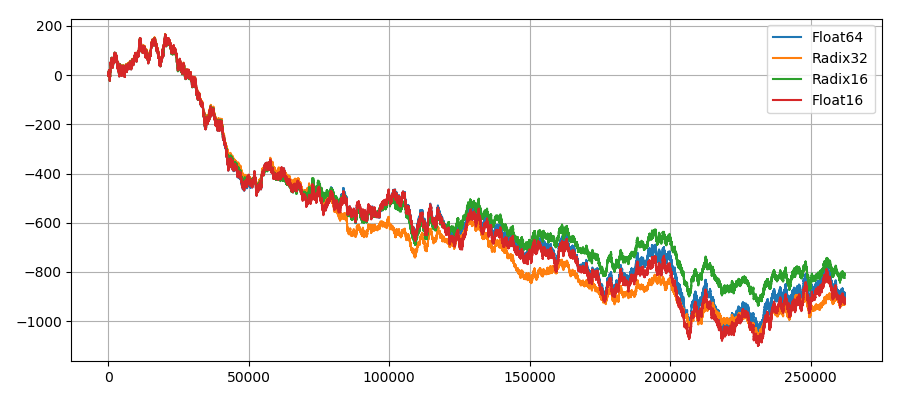

In [5]:
for key, val in results.items():
    plt.plot(val, label=key)
show_plot()

<IPython.core.display.Javascript object>


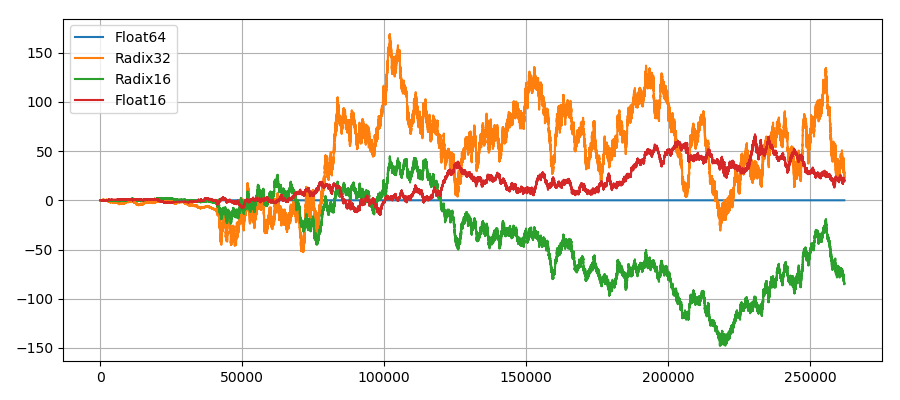

Float64 SNR: inf dB
Radix32 SNR: 21.525178413998184 dB
Radix16 SNR: 23.11030820129544 dB
Float16 SNR: 30.51442367360427 dB


/home/gaspar/git/pyha/pyha/common/util.py:109: RuntimeWarning: divide by zero encountered in double_scalars
  snr_db = 20 * np.log10(sig_pow / err_pow)


In [6]:
for key, val in results.items():
    plt.plot(results['Float64'] - val, label=key)
show_plot()

for key, val in results.items():
    print(f'{key} SNR: {snr(results["Float64"], val)} dB')
#     plt.plot(results['Float64'] - val, label=key)